# 1.

### 1.
Simple Linear Regression models the relationship between a dependent variable and a single independent variable, resulting in a linear equation with a single slope and intercept. In contrast, Multiple Linear Regression extends this by including two or more independent variables, allowing for a more comprehensive understanding of the dependent variable. This additional complexity enables the model to explain more variance, account for confounding factors, and increase accuracy by considering multiple predictors.

### 2. 
In Simple Linear Regression, a continuous variable represents data with a range of values, like age or income, and allows for continuous changes in the response variable. An indicator variable, often binary (such as 0 or 1), represents categorical data and shifts the intercept based on the group. The continuous model form is Y = β0 + β1X , while the indicator form is Y = β0 + β1D, where D takes values of 0 or 1.

### 3. 
When a single indicator variable is added to a Multiple Linear Regression model alongside a continuous variable, it adjusts the intercept based on the indicator’s category while retaining the continuous predictor’s effect. This setup enables the model to capture both an overall trend and group-specific shifts. In this setup, Simple Linear Regression is expressed as Y = β0 + β1X, while the Multiple Linear Regression with an indicator is Y = β0 + β1X + β2D.

### 4.
Adding an interaction term between a continuous variable and an indicator variable in a Multiple Linear Regression model allows the slope to change based on the indicator’s value. This term makes the relationship between the continuous predictor and the dependent variable vary according to the category of the indicator, thus modeling more complex interactions. The resulting form is Y = β0 + β1X + β2D + β3 (X * D).

### 5.
When a Multiple Linear Regression model is based only on indicator variables from a non-binary categorical variable, each level of the category is represented with its own binary (dummy) variable. This structure allows the model to assign separate intercepts for each category, effectively modeling distinct mean responses for each. The form is Y = β0 + β1D1 + β2D2 + ... + βk Dk, with dummy encoding creating a binary variable for each category level to handle non-binary categorical data.

# 2.

### 1. 
In this scenario, the outcome variable is the effectiveness of advertising campaigns, measured by sales increase or customer engagement, while the predictor variables are the budgets for TV and online advertising. Since the effectiveness of TV ads might depend on the online advertising budget (and vice versa), there’s an interaction effect, where the combined impact of both budgets on effectiveness is not simply additive. Without considering interaction, the model predicts effectiveness additively: Effectiveness = β0 + β1 * TV Budget + β2 * Online Budget, with each budget having an independent effect. Including an interaction term adds complexity: Effectiveness = β0 + β1 * TV Budget + β2 * Online Budget + β3 * TV Budget * Online Budget, allowing one budget’s impact to vary based on the other.

### 2. 
To make predictions, values are substituted into the model equations. The additive model (without interaction) assumes that each budget’s effect on effectiveness is independent. In contrast, the interaction model captures combined effects, where the influence of one budget might depend on the other. This difference allows the interaction model to provide more nuanced predictions based on both individual and combined budget influences, while the additive model gives fixed, independent impacts.

# 3.

### Here is the code:

In [4]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the Canadian Social Connection Survey dataset
data_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(data_url)

# Load the variable names file to understand the columns in the dataset
var_names_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
var_names = pd.read_csv(var_names_url)

# Display the variable names and descriptions for reference
print("Variable names and descriptions:")
print(var_names.head())  # Display the first few rows

# Check the column names in the main dataset to confirm variable names
print("\nColumn names in the dataset:")
print(data.columns)

# Define the multiple linear regression formula
# Replace 'outcome_variable', 'age', 'income', 'employment_status', and 'region' with actual variable names
formula = 'outcome_variable ~ age + income + C(employment_status) + C(region)'

# Fit the multiple linear regression model
mlr_model = smf.ols(formula, data=data).fit()
print("\nMultiple Linear Regression Summary:")
print(mlr_model.summary())




/tmp/ipykernel_53/1749421767.py:6: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_url)


Variable names and descriptions:
   row     dataset    old_var               new_var           text
0    1  2021_cross  StartDate     SURVEY_start_date     Start Date
1    2  2021_cross    EndDate       SURVEY_end_date       End Date
2    3  2021_cross     Status  SURVEY_response_type  Response Type
3    4  2021_cross  IPAddress     SURVEY_ip_address     IP Address
4    5  2021_cross   Progress       SURVEY_progress       Progress

Column names in the dataset:
Index(['UNIQUE_id', 'UNIQUE_num_records', 'ELIGIBLE_consent',
       'GEO_residence_canada', 'GEO_province', 'DEMO_age', 'DEMO_gender',
       'DEMO_identity_vetrans', 'DEMO_identity_indigenous',
       'DEMO_identity_lgbtq',
       ...
       'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score',
       'PSYCH_body_self_image_questionnaire_fatness_evaluation_score',
       'PSYCH_body_self_image_questionnaire_negative_affect_score',
       'PSYCH_body_self_image_questionnaire_social_dependence_score',
       'PSYCH_

PatsyError: Error evaluating factor: NameError: name 'age' is not defined
    outcome_variable ~ age + income + C(employment_status) + C(region)
                       ^^^

# 4.

The apparent contradiction between the model’s low R-squared (17.6%) and large, statistically significant coefficients reflects a difference between overall model fit and individual predictor impact. An R-squared of 17.6% suggests that the predictors collectively explain only a small portion of the outcome’s variance, indicating the model may be missing influential factors or that the outcome is complex and influenced by many unmodeled variables. 

However, large coefficients with strong statistical significance reveal that some predictors have a substantial, reliable effect on the outcome. This suggests that, while individual predictors relate meaningfully to the outcome, they don’t together capture much of its overall variability. Possible reasons for this discrepancy include omitted variables, where other influential factors are missing from the model, or data noise and external influences that make the outcome difficult to predict. Thus, R-squared and p-values highlight different aspects of the model: R-squared assesses collective explanatory power, while p-values show the reliability of specific predictor effects. This distinction reveals that a model can have statistically important predictors without fully explaining the outcome’s variability.

# 5.

This set of five cells demonstrates how to evaluate model generalizability by comparing in-sample and out-of-sample R-squared values in linear regression. The workflow illustrates the process of splitting data into training and testing sets, fitting models with varying complexity, and calculating R-squared values as performance metrics. The approach highlights whether each model’s predictions are generalizable (i.e., perform well on unseen data) or overfit to the training data.

### Cell 1: Importing Libraries and Preparing Data
In this cell, the necessary libraries (numpy and train_test_split from sklearn) are imported, and the Pokémon dataset (pokeaman) is prepared by filling NaN values in the "Type 2" column with "None". A 50-50 train-test split is defined for evaluating both in-sample and out-of-sample performance, setting a random seed for reproducibility. This setup allows for a fair comparison of model predictions on training (in-sample) versus testing (out-of-sample) data.

### Cell 2: Fitting a Simple Linear Model (Model 3)
This cell fits a simple linear regression model (Model 3) on the training data with "Attack" and "Defense" as predictors for "HP". The model is trained using only the training portion (pokeaman_train), and its summary includes coefficients, p-values, and the in-sample R-squared value. Predictions (yhat_model3) are made on the test data (pokeaman_test), representing the model’s performance on unseen data. The in-sample R-squared is reported, and the out-of-sample R-squared is calculated by correlating the observed and predicted HP values in the test set.

### Cell 3: Interpretation of Model 3 Results
This cell compares the in-sample and out-of-sample R-squared values for Model 3. A lower out-of-sample R-squared value than the in-sample R-squared suggests that Model 3 may not fully generalize to new data, indicating possible overfitting. This step reveals whether a simpler model can achieve stable, generalized predictions without overfitting to the training data.

### Cell 4: Fitting a Complex Model (Model 4)
Here, a more complex model (Model 4) is specified with multiple predictors and interactions, including "Attack", "Defense", "Speed", "Legendary", "Sp. Def", and "Sp. Atk". This model aims to improve predictive power by adding layers of interaction among predictors. However, the code carefully avoids adding interactions for categorical variables such as "Generation", "Type 1", and "Type 2", which would create an unmanageably large number of interaction terms and lead to computational overload. Model 4 is then fit to the training data, with predictions (yhat_model4) generated on the test set.

### Cell 5: Interpretation of Model 4 Results
Finally, the in-sample and out-of-sample R-squared values for Model 4 are reported and compared. If Model 4 shows a high in-sample R-squared but a substantially lower out-of-sample R-squared, this indicates that the model may be overfitting, capturing noise rather than general patterns. This would imply that the increased complexity, while improving fit to the training data, does not generalize well to the test data.

### Summary
This sequence of cells illustrates the importance of assessing generalizability by comparing in-sample and out-of-sample R-squared values. A large gap between these values suggests overfitting, where the model performs well on the training data but poorly on new data, limiting its practical use. This approach underscores the value of using a train-test split to evaluate whether a model’s predictions are likely to hold beyond the dataset on which it was trained.

# 6.
The `model4_linear_form` generates a complex design matrix (`model4_spec.exog`) by creating multiple interaction terms among predictors, leading to a high-dimensional matrix where each column represents a unique interaction or original predictor. This design matrix is prone to **multicollinearity**, seen in the high correlations among its columns (`np.corrcoef(model4_spec.exog)`), indicating that many predictors share overlapping information. 

Multicollinearity reduces model stability, as the highly correlated predictors cause the model to fit specific idiosyncrasies in the training data rather than generalizable patterns. As a result, the model performs well on training data but poorly on test data, a symptom of overfitting. Thus, the complexity of `model4`’s interactions makes it highly sensitive to training data noise, preventing it from accurately predicting new, unseen data. This illustrates how excessive complexity and multicollinearity in a design matrix can undermine a model’s out-of-sample generalization.

# 7.
The progression from `model3_fit` through `model4_fit`, `model5_linear_form`, `model6_linear_form`, and `model7_linear_form` illustrates a strategy of incrementally adding complexity to balance predictive power with generalizability. Moving from `model3` to `model4`, interactions are added to capture richer relationships, but this leads to multicollinearity and overfitting, as `model4` becomes sensitive to noise in the training data. `Model5` refines this by selectively including interactions likely to be meaningful, aiming to preserve complexity without overwhelming the model with noise. `Model6` further trims insignificant predictors, simplifying the model for stability, while `model7` reaches an optimized form by including only the most impactful predictors. This gradual refinement process seeks to retain essential predictive detail while enhancing out-of-sample accuracy and generalizability.

# 8.

Here’s how to set up a loop that repeatedly splits the data, fits a model, and calculates both in-sample and out-of-sample R-squared values for each split. By not setting a random seed within the loop, the model performance metrics will vary across iterations, providing insight into the model's variability in different train-test splits.

### Code Implementation:

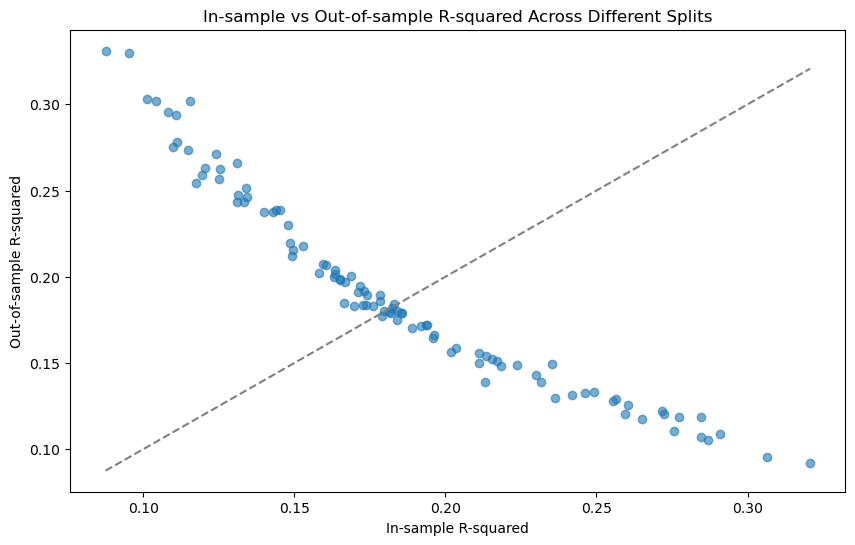

In [6]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset (using the example dataset provided for context)
data_url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
data = pd.read_csv(data_url)

# Fill NaN values with 'None' for simplicity
data.fillna('None', inplace=True)

# Convert categorical columns to binary indicators or other encodings as needed
data['Legendary'] = data['Legendary'].astype(int)  # Convert to integer (0 or 1)
data['HP'] = pd.to_numeric(data['HP'], errors='coerce')
data['Attack'] = pd.to_numeric(data['Attack'], errors='coerce')
data['Defense'] = pd.to_numeric(data['Defense'], errors='coerce')

# Store results
in_sample_r2 = []
out_of_sample_r2 = []

# Run loop for multiple train-test splits
for _ in range(100):  # Adjust the range for more or fewer iterations
    # Split data into train and test sets with different random splits each time
    train_data, test_data = train_test_split(data, train_size=0.5)
    
    # Fit the model on the training data
    model = smf.ols(formula='HP ~ Attack + Defense', data=train_data).fit()
    
    # Calculate in-sample R-squared
    in_sample_r2.append(model.rsquared)
    
    # Calculate out-of-sample R-squared
    y_pred = model.predict(test_data)
    y_actual = test_data['HP']
    out_of_sample_r2.append(np.corrcoef(y_actual, y_pred)[0, 1] ** 2)

# Visualize the paired R-squared values
plt.figure(figsize=(10, 6))
plt.scatter(in_sample_r2, out_of_sample_r2, alpha=0.6)
plt.xlabel("In-sample R-squared")
plt.ylabel("Out-of-sample R-squared")
plt.title("In-sample vs Out-of-sample R-squared Across Different Splits")
plt.plot([min(in_sample_r2), max(in_sample_r2)], [min(in_sample_r2), max(in_sample_r2)], linestyle='--', color='gray')
plt.show()


This demonstration calculates and visualizes paired in-sample and out-of-sample R-squared values across multiple random train-test splits without a fixed seed. Each point in the scatter plot represents one train-test split, with the in-sample R-squared on the x-axis and out-of-sample R-squared on the y-axis. Ideally, points would align closely along the diagonal line, suggesting stable generalization.

The purpose is to observe variability in the model’s generalizability across different data splits. If the points vary greatly (with high in-sample R-squared and low out-of-sample R-squared), it indicates that the model may be overfitting to specific training sets rather than capturing generalizable patterns. This variability shows that model performance depends on the training data's composition and highlights the importance of using multiple splits to assess a model’s reliability.

# 9.

This illustration evaluates the generalizability of `model7_fit` and `model6_fit` by testing their performance in a sequential, time-based prediction scenario, which simulates real-world conditions where data arrives over time. Although `model7` was previously found to outperform `model6` on random splits due to its higher complexity, this added complexity raises concerns of overfitting, as it may capture patterns specific to the training set that don’t generalize well to new data. In this analysis, each model is trained on earlier generations of Pokémon data (e.g., Generation 1 or Generations 1-5) to predict subsequent generations, reflecting the sequential nature of real-world predictions. The results show that, while `model7` achieves higher accuracy on shuffled data splits, it struggles in a time-based setup, exhibiting a significant drop in out-of-sample R-squared when applied to future data. In contrast, the simpler `model6` demonstrates more consistent performance across generations, suggesting that simpler models are often better suited to handle variability over time and are less prone to overfitting. This analysis emphasizes the advantage of using simpler, more interpretable models in real-world scenarios, where robustness to data evolution is crucial, even if they might slightly underperform on random splits compared to more complex models.

# Chatbot session summary

#### Link to chatbot session: https://chatgpt.com/share/6736b125-04e4-8004-aa31-2ec4058399d3

In this session, we explored various advanced aspects of model generalization and overfitting in linear regression using Pokémon data. Starting with an understanding of how "in-sample" and "out-of-sample" \( R^2 \) metrics reflect model performance and generalizability, we implemented a loop to observe the variability of these metrics across multiple random train-test splits, illustrating the importance of a stable model that consistently generalizes to new data. We then delved into a detailed analysis of different model forms, extending and developing from simpler to more complex models (e.g., from `model3_fit` through `model7_linear_form`), focusing on how interactions, predictor selection, and model complexity impact multicollinearity and out-of-sample performance. Further, we examined model generalization across subsets of Pokémon generations by training models on specific generations (such as Generation 1 or Generations 1–5) and testing their ability to predict data from other generations (like Generation 6). This approach illustrated the effects of overfitting to specific subsets and emphasized the importance of training on diverse data for robust predictions. The session underscored the principles of model selection, overfitting mitigation, and the need for diverse data to achieve models that generalize effectively beyond their training sets.
